C:\Users\Yang Jiaye\AppData\Local\Temp\ipykernel_20316\441859490.py:42: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


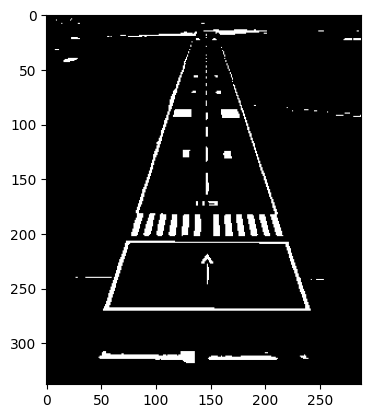

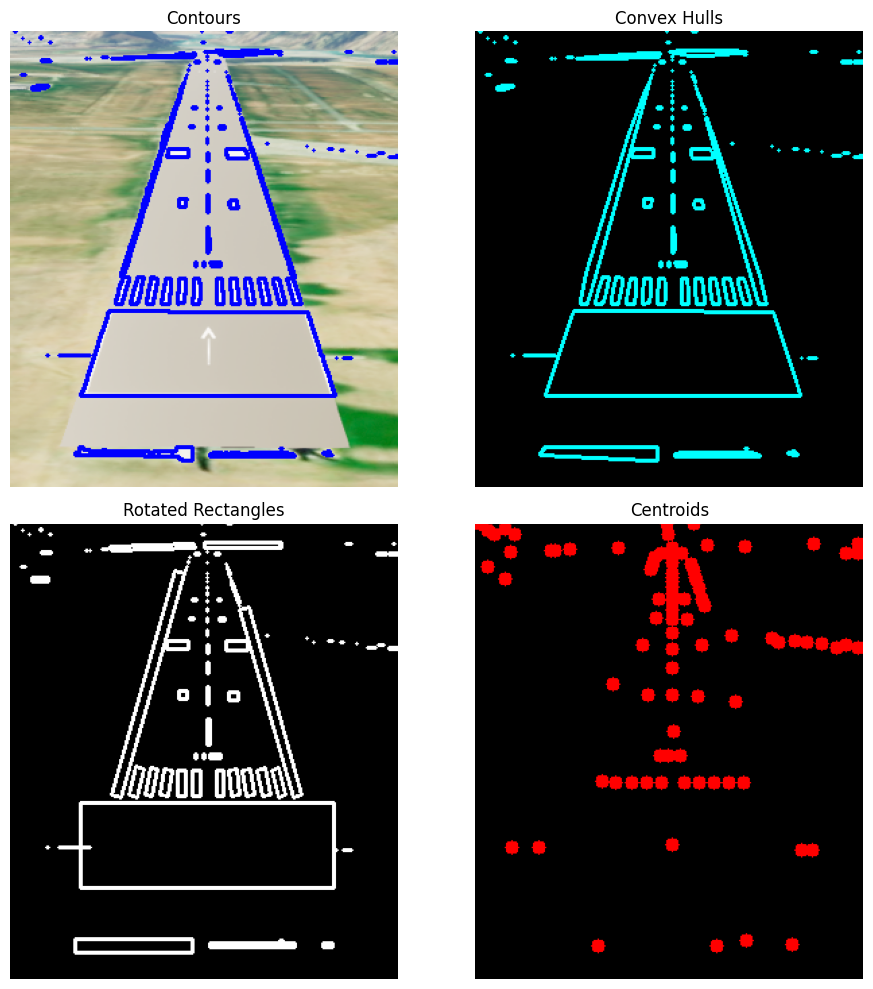

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('images/4.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get binary image
ret, thresh = cv2.threshold(gray, 220, 255, 0)

plt.imshow(thresh, cmap='gray')

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw blue contours on the original image
cv2.drawContours(image, contours, -1, (255, 0, 0), 2)

# Create an empty image for convex hulls
convex_hulls_image = np.zeros_like(image)

# Create an empty image for rotated rectangles
rotated_rectangles_image = np.zeros_like(image)

# Create an empty image for centroids
centroids_image = np.zeros_like(image)

# Process each contour
for contour in contours:
    # Get the convex hull of the contour
    hull = cv2.convexHull(contour)
    
    # Draw the convex hull in cyan
    cv2.drawContours(convex_hulls_image, [hull], -1, (255, 255, 0), 2)
    
    # Get the rotated rectangle that best fits the contour
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # Draw the rotated rectangle in white
    cv2.drawContours(rotated_rectangles_image, [box], 0, (255, 255, 255), 2)
    
    # Calculate the centroid of the rectangle
    centroid_x = int(rect[0][0])
    centroid_y = int(rect[0][1])
    
    # Draw the centroid in red
    cv2.circle(centroids_image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)

# Display the images
# Display the images using matplotlib's pyplot
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title('Contours')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(222)
plt.title('Convex Hulls')
plt.imshow(cv2.cvtColor(convex_hulls_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(223)
plt.title('Rotated Rectangles')
plt.imshow(cv2.cvtColor(rotated_rectangles_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(224)
plt.title('Centroids')
plt.imshow(cv2.cvtColor(centroids_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
